# Wine Quality Analysis

**Importing dependecies**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as TTS
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression as LOR
from sklearn.metrics import accuracy_score,classification_report,recall_score,precision_score,f1_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=UserWarning)



In [2]:
wine_data=pd.read_csv("winequality.csv")
wine_data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [3]:
wine_data.columns

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')

In [4]:
wine_data.describe()


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
count,1599
unique,1359
top,7.2;0.36;0.46;2.1;0.074;24;44;0.99534;3.4;0.85...
freq,4


In [5]:
wine_data.shape

(1599, 1)

In [6]:
file_path = r'C:\Users\Saksh\Python ML 2024\winequality.csv'
wine_data = pd.read_csv(file_path, delimiter=';')

print(wine_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [7]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine_data.shape


(1599, 12)

In [9]:
wine_data.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [10]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
wine_data.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
def category(quality):
    quality = float(quality)
    if 0 < quality <= 5:
        return "normal"
    elif 5 < quality <= 10:
        return "good"
    else:
        return "best"

# Apply the function to the 'quality' column to create wine status labels
wine_data['Wine_Status_Label'] = wine_data['quality'].apply(category)

# Create the new DataFrame
WSL = wine_data[['citric acid', 'density', 'quality', 'Wine_Status_Label']].copy()
WSL.rename(columns={'citric acid': 'Citrus_Acid_Content', 'density': 'Density_of_Wine'}, inplace=True)

# Display the first few rows of the new DataFrame
print(WSL)

      Citrus_Acid_Content  Density_of_Wine  quality Wine_Status_Label
0                    0.00          0.99780        5            normal
1                    0.00          0.99680        5            normal
2                    0.04          0.99700        5            normal
3                    0.56          0.99800        6              good
4                    0.00          0.99780        5            normal
...                   ...              ...      ...               ...
1594                 0.08          0.99490        5            normal
1595                 0.10          0.99512        6              good
1596                 0.13          0.99574        6              good
1597                 0.12          0.99547        5            normal
1598                 0.47          0.99549        6              good

[1599 rows x 4 columns]


*Data visualisation*

<Figure size 1000x5000 with 0 Axes>

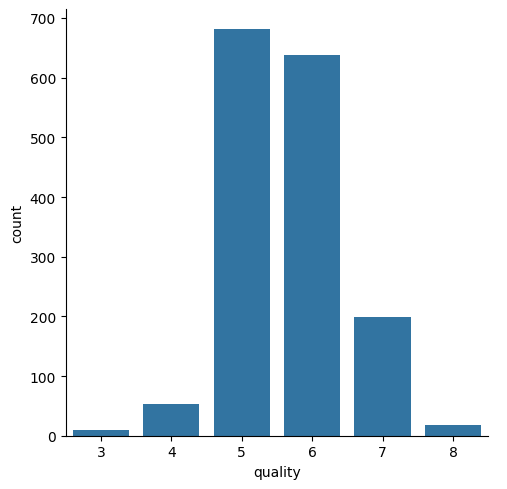

In [14]:
plot = plt.figure(figsize=(10,50))
sns.catplot(x='quality',data=wine_data,kind ='count')


* volatile acidity vs Quality*

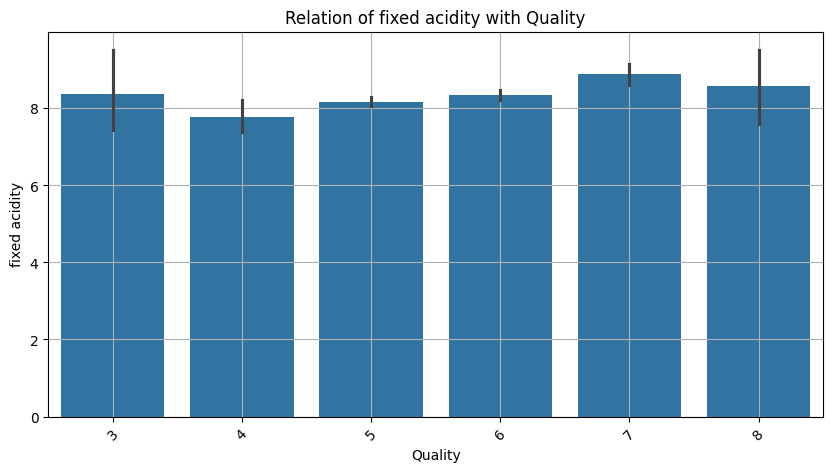

In [15]:
plot = plt.figure(figsize=(10, 5))
sns.barplot(x='quality', y='fixed acidity', data=wine_data )
plt.title('Relation of fixed acidity with Quality')
plt.xlabel('Quality')
plt.ylabel('fixed acidity')
plt.grid(True)
plt.xticks( rotation=45)

plt.show()

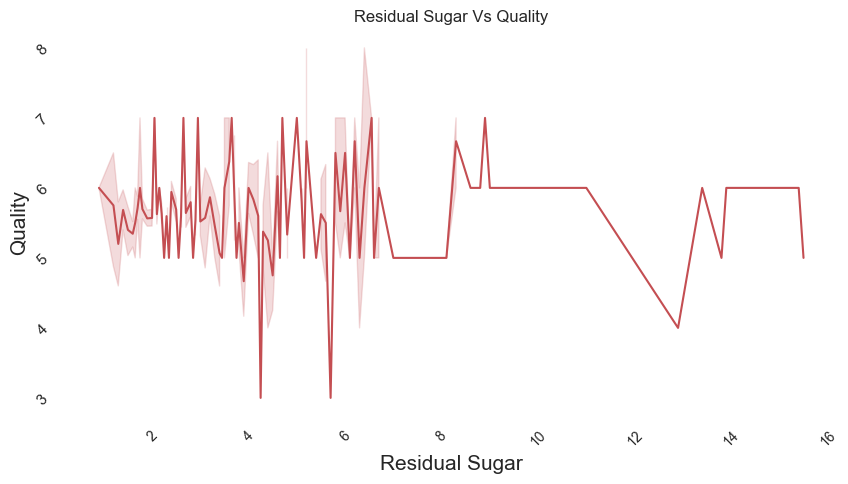

In [16]:
plt.figure(figsize=(10, 5))
sns.set(rc={"axes.facecolor":"#ffffff", "axes.grid":True, "xtick.labelsize":10})

plt.title("Residual Sugar Vs Quality")
plt.ylabel("Quality",fontsize=15)
plt.xlabel("Residual Sugar",fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
sns.lineplot(x=wine_data["residual sugar"], y=wine_data["quality"], color='r')


plt.show()
     

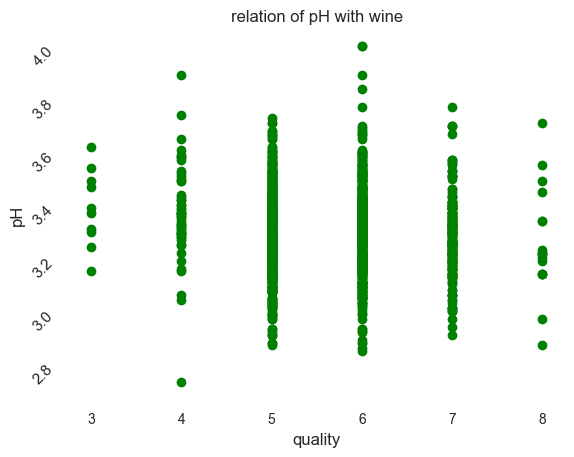

In [17]:
plt.scatter(wine_data['quality'],wine_data['pH'], color = 'green')
plt.title('relation of pH with wine')
plt.xlabel('quality')
plt.ylabel('pH')
plt.yticks(rotation=45)
plt.show()

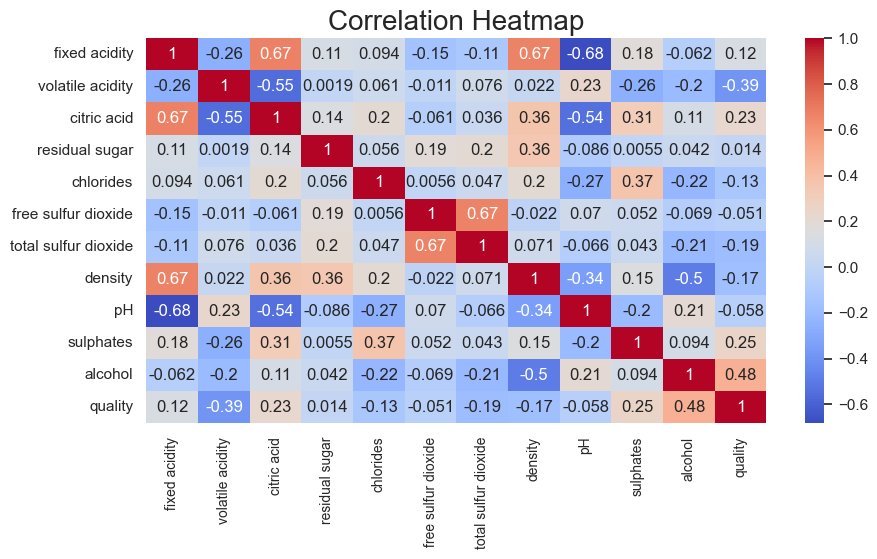

In [18]:
wine_data_numeric = wine_data.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 5))
corr = wine_data_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap", fontsize=20)
plt.show()
     

**Data Preprocessing**

In [19]:
#seaprating data column


In [20]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Wine_Status_Label'],
      dtype='object')

In [ ]:
sns.pairplot(wine_data)

In [22]:
X =wine_data.drop(['volatile acidity', 'total sulfur dioxide', 'chlorides'], axis = 1)
X

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine_Status_Label
0,7.4,0.00,1.9,11.0,0.99780,3.51,0.56,9.4,5,normal
1,7.8,0.00,2.6,25.0,0.99680,3.20,0.68,9.8,5,normal
2,7.8,0.04,2.3,15.0,0.99700,3.26,0.65,9.8,5,normal
3,11.2,0.56,1.9,17.0,0.99800,3.16,0.58,9.8,6,good
4,7.4,0.00,1.9,11.0,0.99780,3.51,0.56,9.4,5,normal
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,32.0,0.99490,3.45,0.58,10.5,5,normal
1595,5.9,0.10,2.2,39.0,0.99512,3.52,0.76,11.2,6,good
1596,6.3,0.13,2.3,29.0,0.99574,3.42,0.75,11.0,6,good
1597,5.9,0.12,2.0,32.0,0.99547,3.57,0.71,10.2,5,normal


In [23]:
Y = wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [24]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

wine_data['quality'] = le.fit_transform(wine_data['quality'])

wine_data['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       2
1       2
2       2
3       3
4       2
       ..
1594    2
1595    3
1596    3
1597    2
1598    3
Name: quality, Length: 1599, dtype: int64>

In [29]:
x = wine_data.iloc[:,:11]
y = wine_data.iloc[:,11]

# determining the shape of x and y.
print(x.shape)
print(y.shape)
     

(1599, 11)
(1599,)


In [36]:
x_train, x_test, y_train, y_test = TTS(x, y, test_size=0.2, random_state=42)

In [32]:
print(y.shape,y_train.shape,y_test.shape)

(1599,) (1279,) (320,)


In [37]:
x = wine_data.iloc[:,:11]
y = wine_data.iloc[:,11]

# determining the shape of x and y.
print(x.shape)
print(y.shape)
     

(1599, 11)
(1599,)


In [33]:
from sklearn.tree import DecisionTreeClassifier

# Creating the model
model = DecisionTreeClassifier()

# Feeding the training set into the model
model.fit(x_train, y_train)

# Predicting the results for the test set
y_pred = model.predict(x_test)

# Calculating the training and testing accuracies
print("Training accuracy:", model.score(x_train, y_train))
print("Testing accuracy:", model.score(x_test, y_test))


Training accuracy: 1.0
Testing accuracy: 0.684375


In [34]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.12      0.09      0.11        11
           2       0.76      0.76      0.76       135
           3       0.72      0.68      0.70       142
           4       0.53      0.74      0.62        27
           5       0.00      0.00      0.00         3

    accuracy                           0.68       320
   macro avg       0.35      0.38      0.36       320
weighted avg       0.69      0.68      0.68       320

[[  0   0   0   2   0   0]
 [  1   1   5   4   0   0]
 [  2   4 102  25   2   0]
 [  1   3  27  96  15   0]
 [  0   0   1   5  20   1]
 [  0   0   0   2   1   0]]


**neural netwroks**

In [38]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense


     

In [41]:
# creating the model
model = Sequential()

model = Sequential()

# First hidden layer
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=11))

# Second hidden layer
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# Output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the neural network
# 'binary_crossentropy' loss function is used when the output is binary
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

# Training the model
model.fit(x_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0291 - loss: -0.4987
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0326 - loss: -47.8602
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0255 - loss: -324.4790  
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0245 - loss: -1111.3433
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0377 - loss: -2404.1416
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0362 - loss: -4596.9277
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0335 - loss: -7763.8916
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0288 - loss: -12191.1729  
Epoch 9/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0366 - loss: -17255.2676
Epoch 10/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0350 - loss: -24878.5977  
Epoch 11/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0390 - loss: -3144